## Load library and set inputs

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import cerberus
import swan_vis as swan

import warnings
warnings.filterwarnings("ignore")

from utils import *

In [3]:
samples = os.listdir('kallisto_output')
study = "AD003"
metadata_sample_path = "ad003_metadata_sample.csv"

adata = None

for sample in samples:
    if sample == ".DS_Store":
        continue
    transcript = pd.read_csv(f'kallisto_output/{sample}/transcripts.txt', header=None)
    counts = sc.read_mtx(f'kallisto_output/{sample}/matrix.abundance.mtx', dtype='float32')
    counts.obs.index = [sample]
    counts.var.index = transcript[0].tolist()

    if adata is None:
        adata = counts.copy()
        continue

    adata = ad.concat([adata, counts], axis=0)

adata.obs.index = adata.obs.index.to_series().str.split("_", expand=True)[2].apply(int).values

metadata_sample = pd.read_csv(metadata_sample_path)
metadata_sample.index = metadata_sample['Mouse ID'].values

adata.obs = pd.concat([adata.obs, metadata_sample], axis=1)
adata.obs.index = f"{study}_" + adata.obs.index.astype(str)

transcript_metadata = pd.read_csv("../ref/transcript_list.csv", index_col=0)
adata.var = pd.concat([adata.var, transcript_metadata], axis=1).loc[adata.var.index, :]

adata.write(filename="transcript_exp.h5ad")
adata

AnnData object with n_obs × n_vars = 12 × 141862
    obs: 'Mouse ID', 'Genotype', 'Sex', 'Age', 'Tissue', 'Genotype description'
    var: 'original_transcript_id', 'transcript_type', 'original_transcript_name', 'transcript_id', 'transcript_name', 'gene_id', 'gene_type', 'gene_name'

In [32]:
adata.obs

,Mouse ID,Genotype,Sex,Age,Tissue,Genotype description
AD003_11625,11625,5xFADHEMI,F,4 months,hippocamous,5xFADHEMI
AD003_11628,11628,5xFADWT,F,4 months,hippocamous,5xFADWT
AD003_12670,12670,CLU-h2kbKI_HO,F,4 months,hippocamous,CLU-h2kbKI_HO
AD003_11617,11617,5xFADHEMI,F,4 months,hippocamous,5xFADHEMI
AD003_11627,11627,5xFADWT,F,4 months,hippocamous,5xFADWT
AD003_12648,12648,CLU-h2kbKI_HO,F,4 months,hippocamous,CLU-h2kbKI_HO
AD003_12659,12659,5xCLU-h2kbKI_HO,F,4 months,hippocamous,5xFADHEMI_CLU-h2kbKI_HO
AD003_12660,12660,CLU-h2kbKI_HO,F,4 months,hippocamous,CLU-h2kbKI_HO
AD003_11616,11616,5xFADHEMI,F,4 months,hippocamous,5xFADHEMI
AD003_11629,11629,5xFADWT,F,4 months,hippocamous,5xFADWT


In [2]:
adata = ad.read_h5ad("transcript_exp.h5ad")
kallisto = adata.to_df()
kallisto.index = "kallisto_" + kallisto.index
kallisto.columns = adata.var.transcript_id.values
kallisto

,"ENSMUSG00000102693[1,1,1]","ENSMUSG00000064842[1,1,1]","ENSMUSG00000051951[1,1,1]","ENSMUSG00000051951[2,2,3]","ENSMUSG00000051951[3,3,2]","ENSMUSG00000102851[1,1,1]","ENSMUSG00000103377[1,1,1]","ENSMUSG00000104017[1,1,1]","ENSMUSG00000103025[1,1,1]","ENSMUSG00000089699[1,1,1]",...,"ENSMUSG00000099871[1,1,1]","ENSMUSG00000096850[1,1,1]","ENSMUSG00000095019[1,1,1]","ENSMUSG00000099278[1,1,1]","ENSMUSG00000098647[1,1,1]","ENSMUSG00000095434[1,1,1]","ENSMUSG00000094431[1,1,1]","ENSMUSG00000094621[1,1,1]","ENSMUSG00000095041[1,1,2]","ENSMUSG00000095041[1,2,1]"
kallisto_AD003_11625,0.0,0.0,101.500000,6.00000,3.50000,0.0,9.0,36.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.897003,58.625702
kallisto_AD003_11628,0.0,0.0,41.899300,2.64501,1.45572,0.0,2.0,11.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.264999,33.389999
kallisto_AD003_12670,0.0,0.0,48.880001,3.12000,0.00000,0.0,1.0,6.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.576004,49.175098
kallisto_AD003_11617,0.0,0.0,36.705898,0.00000,2.29412,0.0,1.0,13.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.396698,12.809200
kallisto_AD003_11627,0.0,0.0,57.193901,4.67214,4.13398,0.0,2.0,14.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.294006,61.670300
kallisto_AD003_12648,0.0,0.0,50.939999,1.48545,1.57452,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.805298,23.791500
kallisto_AD003_12659,0.0,0.0,35.513199,2.05000,3.43676,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.841797,27.925699
kallisto_AD003_12660,0.0,0.0,42.627899,1.00000,4.37209,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.449699,15.795700
kallisto_AD003_11616,0.0,0.0,43.790199,2.62309,1.58671,0.0,2.0,19.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.612999,42.475201
kallisto_AD003_11629,0.0,0.0,42.634102,1.00000,3.36585,0.0,1.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.488998,17.966801


In [2]:
sg = swan.read("../swan/swan_graph.p")
talon = sg.adata
talon.write(filename="transcript_exp_talon.h5ad")

Read in graph from ../swan/swan_graph.p


AnnData object with n_obs × n_vars = 12 × 79505
    obs: 'dataset', 'total_counts', 'batch', 'mouse_id', 'study', 'genotype', 'sex', 'genotype_sex', 'genotype_alias', 'genotype_alias_int', 'age', 'tissue', 'biorep_num'
    var: 'tid-0-0-0', 'tid-1-0-0', 'tid-1-0', 'tid-1'
    layers: 'counts', 'tpm', 'pi'

In [3]:
sg = swan.read("../swan/swan_graph.p")
talon = sg.adata.to_df()
talon.index = "talon_AD003_" + sg.adata.obs.mouse_id.astype(str).values
talon.columns = sg.adata.var.index.tolist()
talon

Read in graph from ../swan/swan_graph.p


,"ENSMUSG00000000001[1,1,1]","ENSMUSG00000000056[1,4,1]","ENSMUSG00000000056[1,4,4]","ENSMUSG00000000056[1,4,6]","ENSMUSG00000000056[1,5,4]","ENSMUSG00000000056[1,5,6]","ENSMUSG00000000056[4,4,1]","ENSMUSG00000000058[1,1,1]","ENSMUSG00000000078[1,1,1]","ENSMUSG00000000085[1,1,2]",...,"hCLU[3,11,1]","hCLU[3,19,1]","hCLU[3,20,1]","hCLU[4,12,1]","hCLU[5,13,1]","hCLU[5,14,1]","hCLU[6,15,1]","hCLU[7,16,1]","hCLU[8,17,1]","hCLU[9,1,1]"
talon_AD003_12517,103,0,99,1,6,1,0,216,68,2,...,79,0,0,8,104,23,6,190,93,173
talon_AD003_12659,130,0,129,3,5,1,0,265,111,7,...,116,0,0,12,195,31,5,259,152,344
talon_AD003_12649,90,0,101,1,6,0,0,225,64,7,...,73,0,0,3,105,19,3,184,104,262
talon_AD003_11616,121,1,106,2,0,0,0,254,65,7,...,0,0,0,0,0,0,0,0,0,0
talon_AD003_11625,118,1,103,7,0,0,0,306,102,9,...,0,0,0,0,0,0,0,0,0,0
talon_AD003_11617,75,0,65,0,0,0,0,211,67,4,...,0,0,0,0,0,0,0,0,0,0
talon_AD003_12648,141,5,173,13,7,0,14,440,126,21,...,124,7,5,15,155,35,8,247,136,235
talon_AD003_12660,103,4,99,10,2,0,11,269,92,8,...,80,9,2,6,119,26,5,193,127,253
talon_AD003_12670,80,2,70,4,5,0,7,261,77,7,...,74,4,5,8,100,25,9,212,89,189
talon_AD003_11628,78,0,106,0,0,0,0,176,38,7,...,0,0,0,0,0,0,0,0,0,0


In [18]:
transcripts = list(set(talon.columns.tolist()) & set(kallisto.columns.tolist()))
kallisto = kallisto[transcripts]
talon = talon[transcripts]
expressionList =  pd.concat([kallisto, talon], axis=0)
expressionList

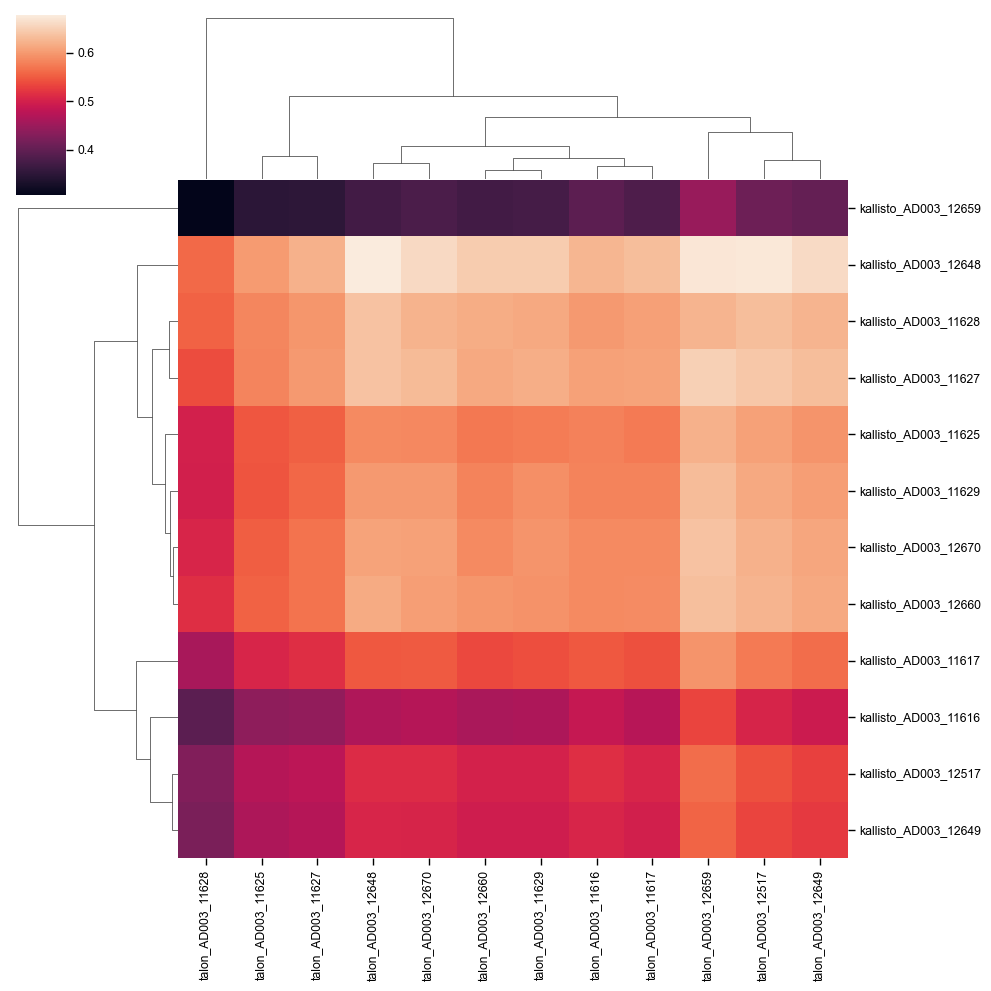

In [26]:
import seaborn as sns

corr = expressionList.T.corr().iloc[:12, 12:]
sns.clustermap(corr)
#expressionList

In [49]:
short = pd.read_csv("short_read/expressionList_sorted.csv", index_col=0)
short_meta = pd.read_csv("short_read/experimentList_sorted.csv", index_col=0)
short_meta = short_meta[short_meta['Time point'] == "4mo"]
short_meta = short_meta[short_meta['Sex'] == "F"]
short_meta = short_meta[short_meta['Group'] == "5xFADHEMI"]

short = short[short_meta['file name']].T
short

,ENSMUSG00000000001.4,ENSMUSG00000000003.15,ENSMUSG00000000028.15,ENSMUSG00000000031.16,ENSMUSG00000000037.16,ENSMUSG00000000049.11,ENSMUSG00000000056.7,ENSMUSG00000000058.6,ENSMUSG00000000078.7,ENSMUSG00000000085.16,...,ENSMUSG00000118384.1,ENSMUSG00000118385.1,ENSMUSG00000118386.1,ENSMUSG00000118387.1,ENSMUSG00000118388.1,ENSMUSG00000118389.1,ENSMUSG00000118390.1,ENSMUSG00000118391.1,ENSMUSG00000118392.1,ENSMUSG00000118393.1
C03_hipp_F_5xFADHEMI_4mo_11617_rsem.genes.results,24.11,0.0,2.20,0.41,0.60,1.19,19.61,28.03,14.01,55.92,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C04_hipp_F_5xFADHEMI_4mo_11625_rsem.genes.results,23.78,0.0,1.69,0.36,1.44,0.47,21.52,31.19,17.98,36.12,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C05_hipp_F_5xFADHEMI_4mo_11626_rsem.genes.results,22.67,0.0,1.95,0.08,0.45,0.00,22.46,25.18,14.83,61.78,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C02_hipp_F_5xFADHEMI_4mo_11616_rsem.genes.results,21.40,0.0,1.67,0.32,0.23,0.00,19.06,21.50,13.19,51.05,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C01_hipp_F_5xFADHEMI_4mo_11615_rsem.genes.results,16.71,0.0,2.01,0.25,1.65,0.56,19.86,21.07,13.53,43.87,...,0.0,0.51,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0


In [68]:
adata = ad.read_h5ad("transcript_exp.h5ad")
adata = adata[adata.obs.Genotype == "5xFADHEMI"]
kallisto = adata.to_df()
kallisto.columns = adata.var.gene_id.values
kallisto = kallisto.groupby(lambda x:x, axis=1).sum()
kallisto.index = "kallisto_" + kallisto.index
#kallisto.columns = adata.var.transcript_id.values
kallisto

,ENSMUSG00000000001.4,ENSMUSG00000000003.15,ENSMUSG00000000028.15,ENSMUSG00000000031.16,ENSMUSG00000000037.16,ENSMUSG00000000049.11,ENSMUSG00000000056.7,ENSMUSG00000000058.6,ENSMUSG00000000078.7,ENSMUSG00000000085.16,...,ENSMUSG00000118384.1,ENSMUSG00000118385.1,ENSMUSG00000118386.1,ENSMUSG00000118387.1,ENSMUSG00000118388.1,ENSMUSG00000118389.1,ENSMUSG00000118390.1,ENSMUSG00000118391.1,ENSMUSG00000118392.1,ENSMUSG00000118393.1
kallisto_AD003_11625,252.0,0.0,12.0,0.0,0.000000,6.0,243.0,558.000183,237.0,90.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kallisto_AD003_11617,108.0,0.0,5.0,1.0,2.000000,1.0,110.0,243.000000,102.0,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kallisto_AD003_11616,172.0,0.0,8.0,1.0,3.000001,5.0,141.0,303.000000,116.0,43.000031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
sg = swan.read("../swan/swan_graph.p")
adata_talon = sg.gene_adata[sg.gene_adata.obs.genotype == "5xFAD-HEMI"]
talon = adata_talon.to_df()
talon.index = "talon_AD003_" + adata_talon.obs.mouse_id.astype(str).values
#talon.columns = sg.adata.var.index.tolist()
talon

Read in graph from ../swan/swan_graph.p


gid,ENSMUSG00000000001.4,ENSMUSG00000000056.7,ENSMUSG00000000058.6,ENSMUSG00000000078.7,ENSMUSG00000000085.16,ENSMUSG00000000088.7,ENSMUSG00000000093.6,ENSMUSG00000000125.5,ENSMUSG00000000126.11,ENSMUSG00000000127.15,...,TALONG000180409,TALONG000180970,TALONG000181667,TALONG000182170,TALONG000182703,TALONG000183012,TALONG000184164,TALONG000184981,TALONG000185035,hCLU
talon_AD003_11616,121,109,254,65,51,3997,0,2,13,20,...,9,43,71,13,7,15,480,99,5,0
talon_AD003_11625,118,111,306,102,67,3975,0,3,19,37,...,1,83,73,5,7,13,367,110,7,0
talon_AD003_11617,75,65,211,67,53,2539,0,4,12,24,...,6,43,43,7,4,6,291,92,3,0


In [73]:
corr.loc['C02_hipp_F_5xFADHEMI_4mo_11616_rsem.genes.results', :]

talon_AD003_11616                                    0.408357
talon_AD003_11625                                    0.433349
talon_AD003_11617                                    0.438947
kallisto_AD003_11625                                 0.443076
kallisto_AD003_11617                                 0.444799
kallisto_AD003_11616                                 0.419607
C03_hipp_F_5xFADHEMI_4mo_11617_rsem.genes.results    0.608251
C04_hipp_F_5xFADHEMI_4mo_11625_rsem.genes.results    0.991349
C05_hipp_F_5xFADHEMI_4mo_11626_rsem.genes.results    0.601519
C02_hipp_F_5xFADHEMI_4mo_11616_rsem.genes.results    1.000000
C01_hipp_F_5xFADHEMI_4mo_11615_rsem.genes.results    0.975652
Name: C02_hipp_F_5xFADHEMI_4mo_11616_rsem.genes.results, dtype: float64

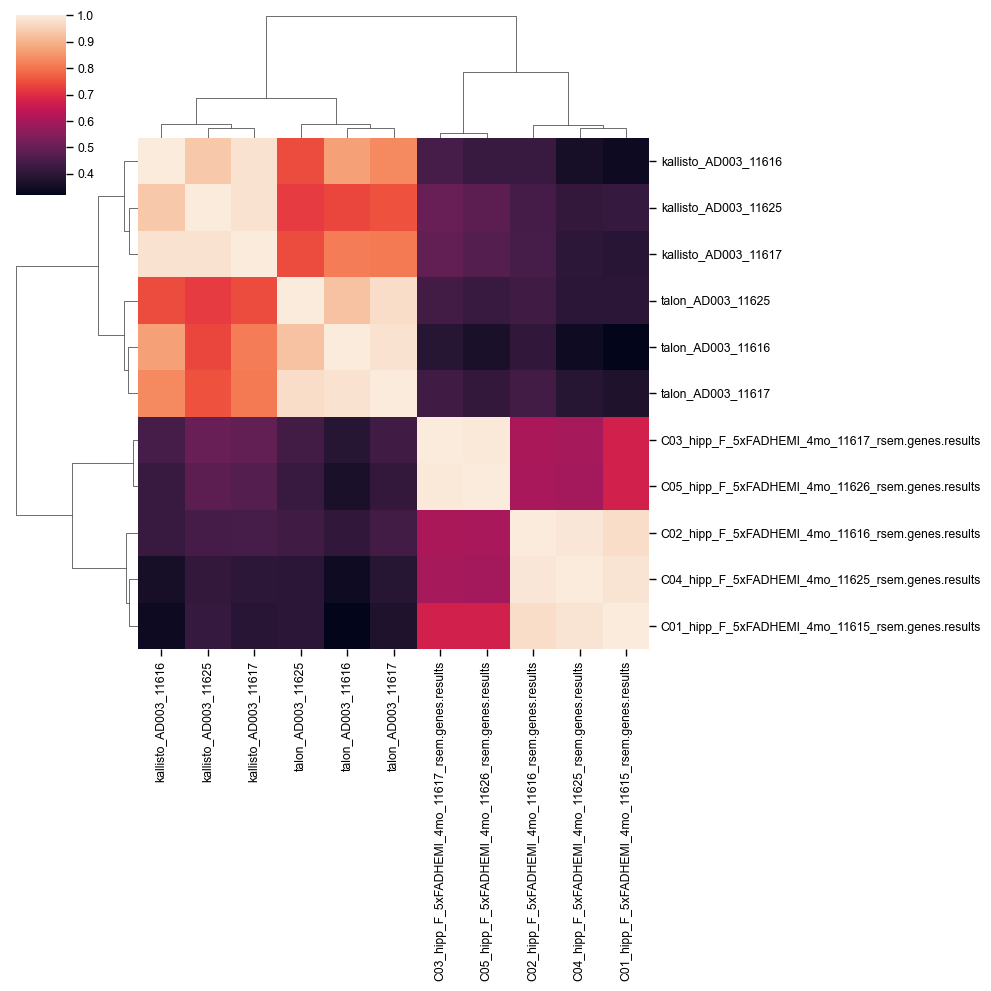

In [69]:
import seaborn as sns

expressionList =  pd.concat([talon, kallisto, short], axis=0)
corr = expressionList.T.corr()#.iloc[:12, 12:]
sns.clustermap(corr)

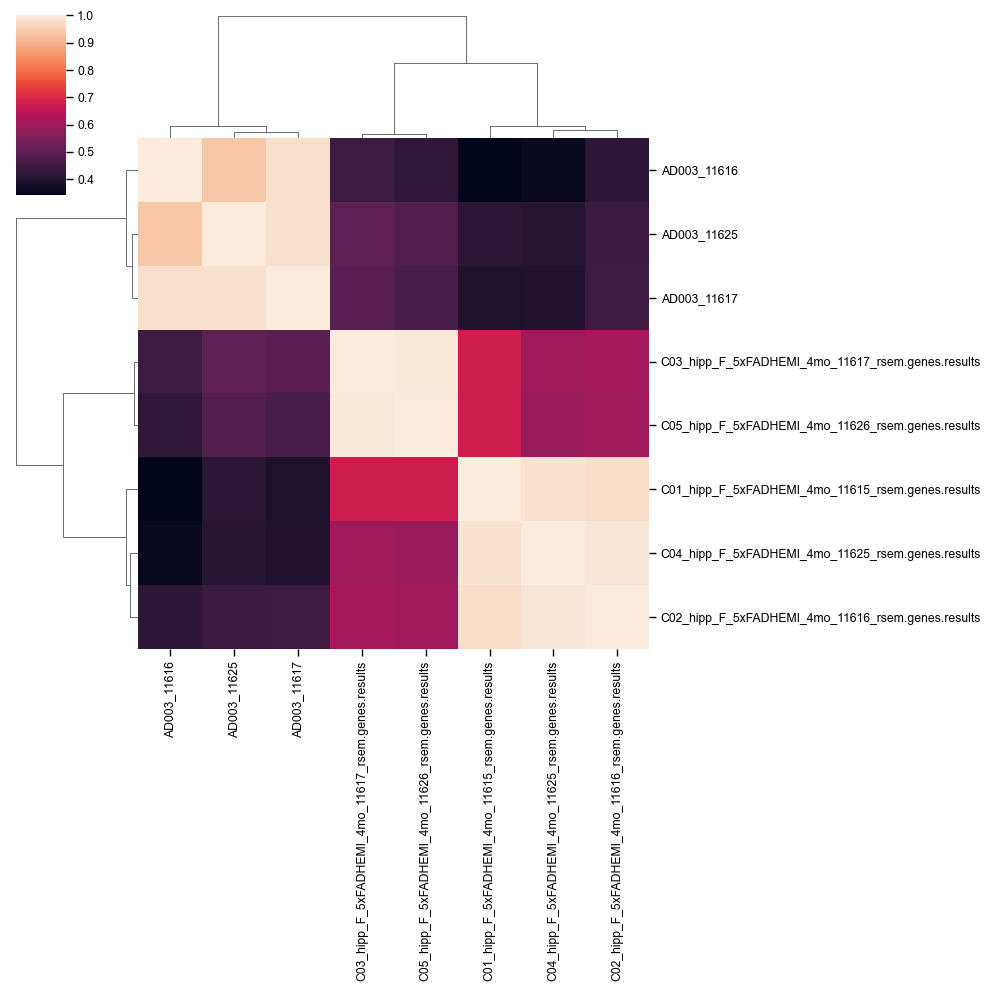

In [57]:
import seaborn as sns

expressionList =  pd.concat([talon, kallisto, short], axis=0)
corr = expressionList.T.corr()#.iloc[:12, 12:]
sns.clustermap(corr)

## Create and run PyDESeq2

Read in graph from swan/swan_graph.p


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.88 seconds.

Fitting dispersion trend curve...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 2.85 seconds.

Fitting LFCs...
... done in 2.16 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.68 seconds.



Log2 fold change & Wald test p-value: genotype 5xFAD-HEMI vs 5xFAD-HEMI-Clu-h2kbKI-HO
                         baseMean  log2FoldChange     lfcSE      stat  \
gid                                                                     
ENSMUSG00000000001.4   103.933937       -0.074793  0.190982 -0.391622   
ENSMUSG00000000056.7   104.225039       -0.349525  0.191715 -1.823147   
ENSMUSG00000000058.6   243.969331        0.103061  0.149721  0.688354   
ENSMUSG00000000078.7    78.267948       -0.048295  0.242814 -0.198897   
ENSMUSG00000000085.16   52.058773        0.262706  0.276311  0.950764   
...                           ...             ...       ...       ...   
ENSMUSG00000118257.1    14.065786       -0.514233  0.502544 -1.023259   
ENSMUSG00000118272.1     2.427011        4.744398  2.187110  2.169255   
ENSMUSG00000118280.1     9.900751       -0.075296  0.599926 -0.125508   
ENSMUSG00000118332.1   194.275450       -0.063119  0.148497 -0.425055   
ENSMUSG00000118346.1   122.590798     

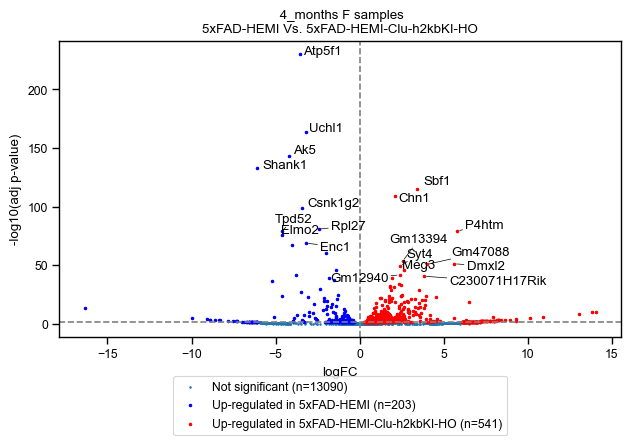

In [5]:
import os
import sys

import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

from utils import *

adata = ad.read_h5ad("transcript_exp.h5ad")

filtering = {'age': ["4_months"], #c("12mo"),
             'sex': ["F"], #c("M"),
             'genotype': ['5xFAD-HEMI', '5xFAD-HEMI-Clu-h2kbKI-HO']}
fname = f"DEG/{'_'.join(filtering['genotype'])}_{'_'.join(filtering['age'])}_{'_'.join(filtering['sex'])}"

df = run_deseq2(sg,
           how='gene',
           obs_filtering=filtering,
           obs_condition='genotype',
           l2fc_thresh=0, 
           adj_p_thresh=0.05,
           ofile=fname)

fname_df = f"{fname}.tsv"
fname_GO = f"DEG/GO/{'_'.join(filtering['genotype'])}_{'_'.join(filtering['age'])}_{'_'.join(filtering['sex'])}"

Gene_ontology_analysis(df=fname_df, 
                                   l2fc_thresh=0, 
                                   adj_p_thresh=0.05, 
                                   sets=['GO_Biological_Process_2023'], 
                                   organism='Mouse',
                                   background=None,
                                   p_value=1, 
                                   file_name=fname_GO)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 2.50 seconds.

Fitting dispersion trend curve...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 2.58 seconds.

Fitting LFCs...
... done in 1.28 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.54 seconds.



Log2 fold change & Wald test p-value: genotype 5xFAD-WT vs 5xFAD-WT-Clu-h2kbKI-HO
                         baseMean  log2FoldChange     lfcSE      stat  \
gid                                                                     
ENSMUSG00000000001.4    94.303290       -0.274973  0.213869 -1.285704   
ENSMUSG00000000056.7   122.044235       -0.245024  0.208322 -1.176179   
ENSMUSG00000000058.6   277.057432       -0.321062  0.158394 -2.026987   
ENSMUSG00000000078.7    84.268130       -0.334389  0.269832 -1.239250   
ENSMUSG00000000085.16   63.843397       -0.000920  0.254466 -0.003617   
...                           ...             ...       ...       ...   
ENSMUSG00000118245.1    26.685529        0.355787  0.422748  0.841606   
ENSMUSG00000118257.1    18.466953        0.060453  0.466548  0.129575   
ENSMUSG00000118280.1     9.285245        0.034511  0.627108  0.055031   
ENSMUSG00000118332.1   232.202522        0.215298  0.159379  1.350859   
ENSMUSG00000118346.1    87.333311        0

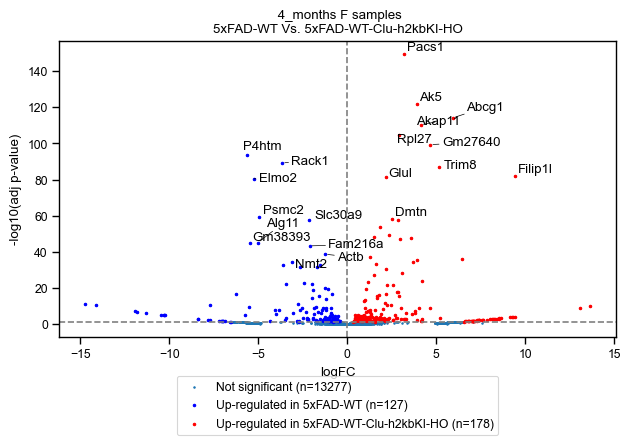

In [8]:
filtering = {'age': ["4_months"], #c("12mo"),
             'sex': ["F"], #c("M"),
             'genotype': ['5xFAD-WT', '5xFAD-WT-Clu-h2kbKI-HO']}
fname = f"DEG/{'_'.join(filtering['genotype'])}_{'_'.join(filtering['age'])}_{'_'.join(filtering['sex'])}"

df = run_deseq2(sg,
           how='gene',
           obs_filtering=filtering,
           obs_condition='genotype',
           l2fc_thresh=0, 
           adj_p_thresh=0.05,
           ofile=fname)

fname_df = f"{fname}.tsv"
fname_GO = f"DEG/GO/{'_'.join(filtering['genotype'])}_{'_'.join(filtering['age'])}_{'_'.join(filtering['sex'])}"

Gene_ontology_analysis(df=fname_df, 
                                   l2fc_thresh=0, 
                                   adj_p_thresh=0.05, 
                                   sets=['GO_Biological_Process_2023'], 
                                   organism='Mouse',
                                   background=None,
                                   p_value=1, 
                                   file_name=fname_GO)

In [9]:
fname_df

'DEG/5xFAD-WT_5xFAD-WT-Clu-h2kbKI-HO_4_months_F.tsv'

In [4]:
sg.adata.obs.genotype.unique()

array(['5xFAD-HEMI_Clu-h2kbKI-HO', '5xFAD-HEMI', '5xFAD-WT_Clu-h2kbKI-HO',
       '5xFAD-WT'], dtype=object)